In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('understat1.com.csv')
df.head()

league  year  position             team  matches  wins  draws  loses  \
0  La_liga  2014         1        Barcelona       38    30      4      4   
1  La_liga  2014         2      Real Madrid       38    30      2      6   
2  La_liga  2014         3  Atletico Madrid       38    23      9      6   
3  La_liga  2014         4         Valencia       38    22     11      5   
4  La_liga  2014         5          Sevilla       38    23      7      8   

   scored  missed  pts  
0     110      21   94  
1     118      38   92  
2      67      29   78  
3      70      32   77  
4      71      45   76

In [ ]:
# Calcul des statistiques descriptives
descriptive_stats = df.describe()
print(descriptive_stats)

              year    position     matches        wins       draws  \
count   684.000000  684.000000  684.000000  684.000000  684.000000   
mean   2016.500000   10.061404   35.935673   13.434211    9.067251   
std       1.709075    5.580165    3.203487    5.880962    2.941824   
min    2014.000000    1.000000   27.000000    2.000000    2.000000   
25%    2015.000000    5.000000   34.000000    9.000000    7.000000   
50%    2016.500000   10.000000   38.000000   12.000000    9.000000   
75%    2018.000000   15.000000   38.000000   16.000000   11.000000   
max    2019.000000   20.000000   38.000000   32.000000   18.000000   

            loses      scored      missed         pts  
count  684.000000  684.000000  684.000000  684.000000  
mean    13.434211   48.190058   48.190058   49.369883  
std      5.510278   17.605374   13.866509   16.957678  
min      1.000000   13.000000   15.000000   13.000000  
25%      9.000000   36.000000   38.000000   38.000000  
50%     14.000000   45.000000   4

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (30) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (30) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (30) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (30) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2

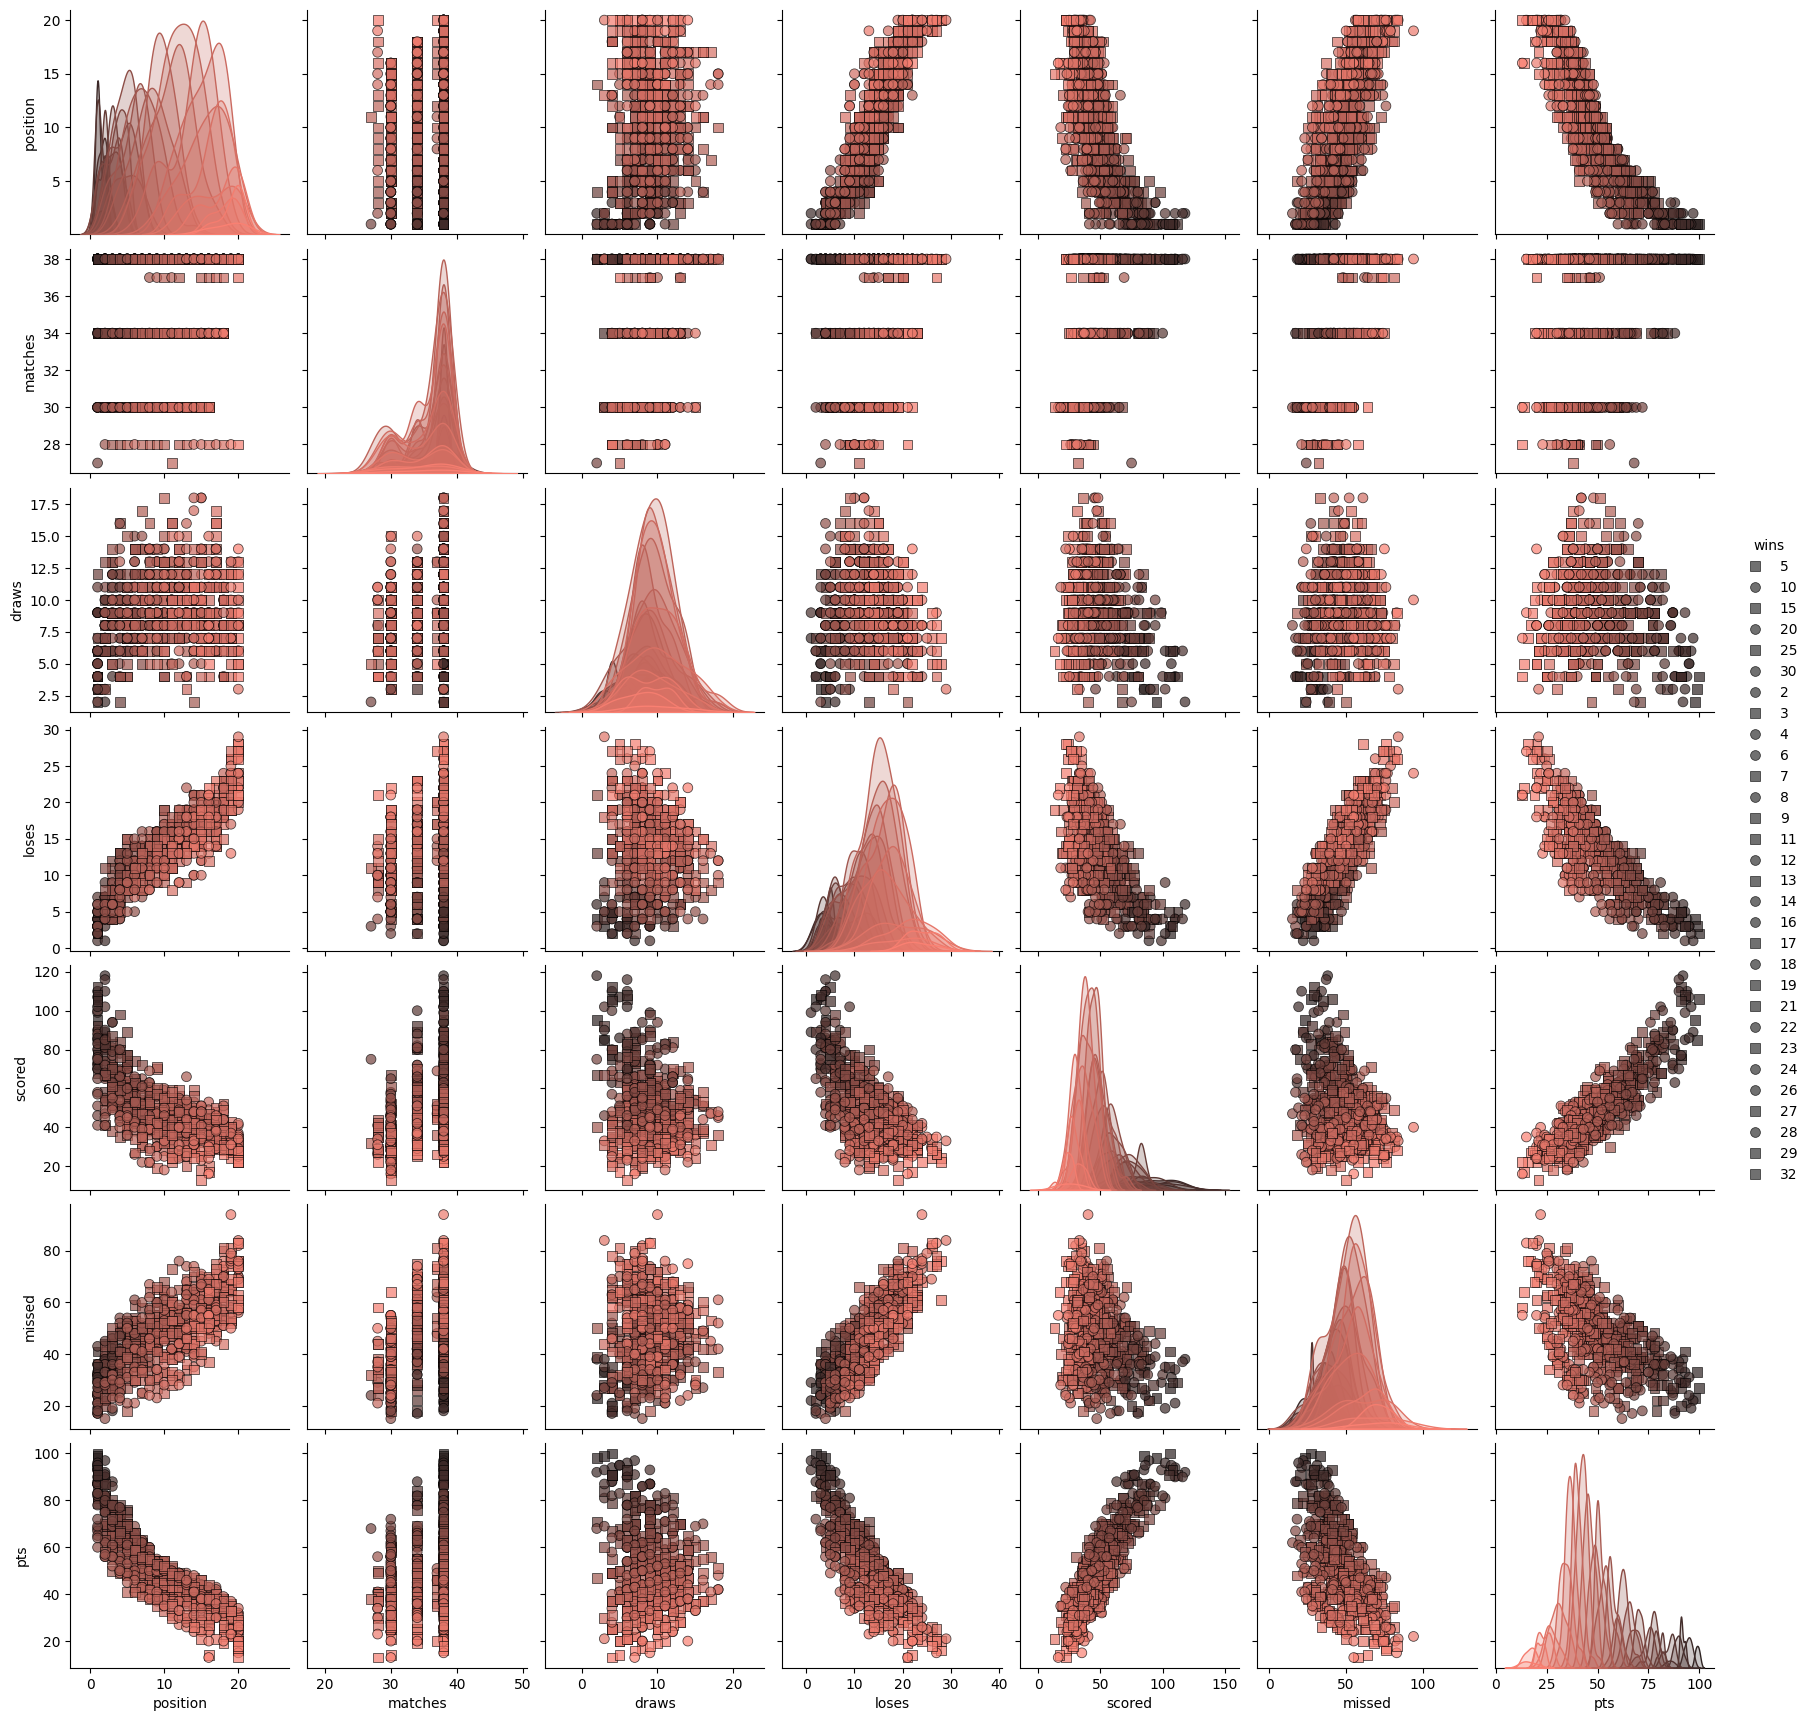

In [ ]:
import seaborn as sns
sns.pairplot(df.iloc[:, 2:], hue='wins', palette='dark:salmon_r', markers=["o", "s"], plot_kws={"s": 50, "edgecolor": "black", "alpha": 0.7})
plt.show()

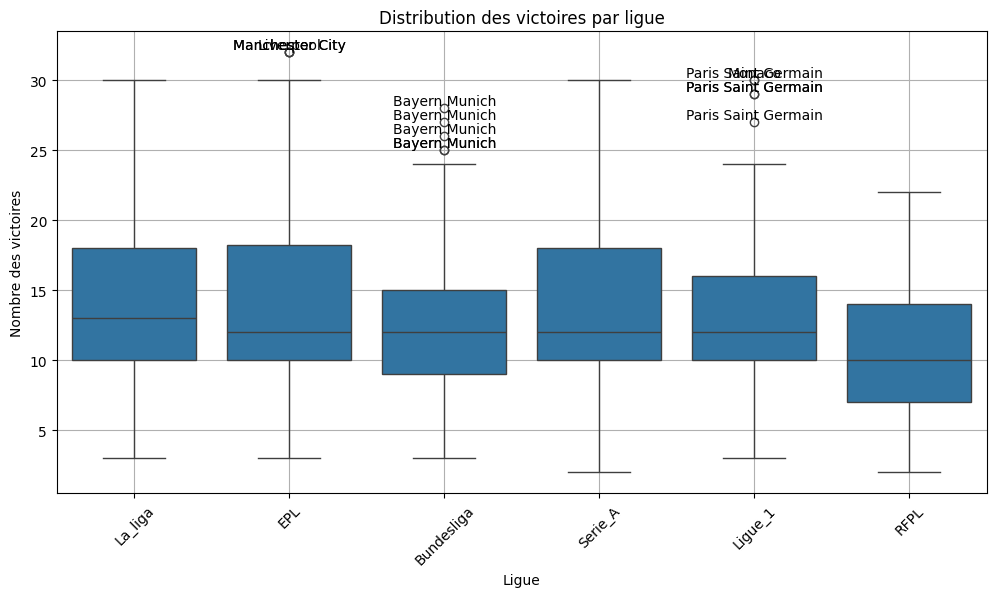

In [ ]:
# Créer le boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='league', y='wins', data=df)
plt.title('Distribution des victoires par ligue')
plt.xlabel('Ligue')
plt.ylabel('Nombre des victoires')
plt.xticks(rotation=45)
plt.grid(True)

# Identifier les outliers
outliers = df.groupby('league')['wins'].apply(lambda x: x[x > x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25))])
outliers_clubs = df.loc[outliers.reset_index()['level_1']]

# Afficher les noms des clubs outliers
for index, row in outliers_clubs.iterrows():
    plt.text(row['league'], row['wins'], row['team'], ha='center', va='bottom')

plt.show()

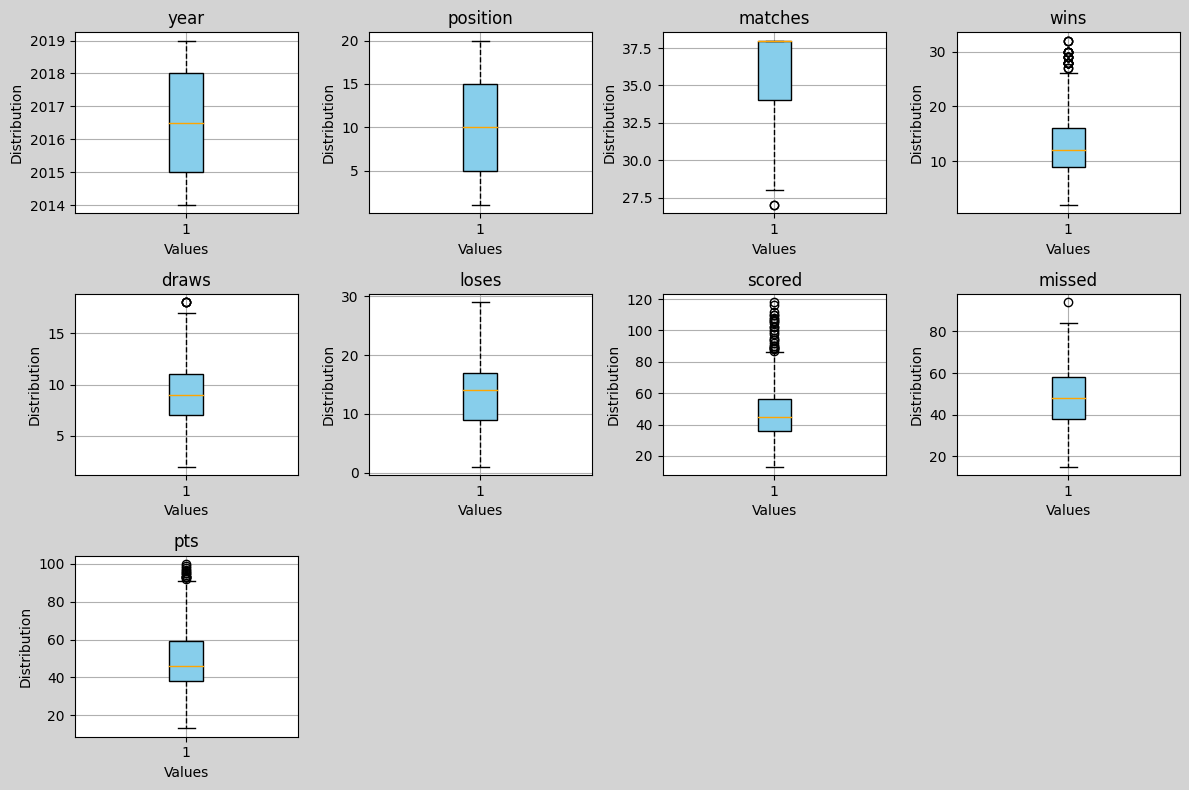

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert all columns to numeric, coercing errors and excluding non-numeric columns automatically
df_numeric = df.select_dtypes(include=[np.number])  # Ensures we only get numeric columns

# Handling NaN values by dropping them (you could also consider filling them)
df_numeric = df_numeric.dropna()

num_plots = df_numeric.shape[1]  # Number of numeric columns
plt.figure(figsize=(12, 8))  # Adjust figure size if needed

for i in range(num_plots):
    plt.subplot((num_plots + 3) // 4, 4, i+1)  # Adjust grid dimensions based on number of plots
    plt.boxplot(df_numeric.iloc[:, i], patch_artist=True,
                boxprops=dict(facecolor='skyblue', color='black'),
                whiskerprops=dict(color='black', linestyle='--'),
                medianprops=dict(color='orange'))
    plt.title(df_numeric.columns[i])
    plt.xlabel('Values')
    plt.ylabel('Distribution')
    plt.grid(True)
    plt.tight_layout()

plt.gcf().patch.set_facecolor('lightgrey')
plt.gcf().patch.set_edgecolor('black')
plt.show()

In [ ]:
import pandas as pd

# Fonction pour retirer les outliers basée sur l'IQR
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_filtered = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_filtered

# Sélectionner seulement les colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])

# Appliquer la fonction pour retirer les outliers
df_clean = remove_outliers(df_numeric)

# Afficher les premières lignes du DataFrame nettoyé
print(len(df))
print(df_clean)



684
     year  position  matches  wins  draws  loses  scored  missed  pts
2    2014         3       38    23      9      6      67      29   78
3    2014         4       38    22     11      5      70      32   77
4    2014         5       38    23      7      8      71      45   76
5    2014         6       38    16     12     10      48      37   60
6    2014         7       38    15     10     13      42      41   55
..    ...       ...      ...   ...    ...    ...     ...     ...  ...
679  2019        12       30     8      9     13      40      39   33
680  2019        13       30     7     10     13      27      46   31
681  2019        14       30     8      7     15      33      40   31
682  2019        15       30     9      4     17      37      41   31
683  2019        16       30     7      6     17      28      52   27

[641 rows x 9 columns]


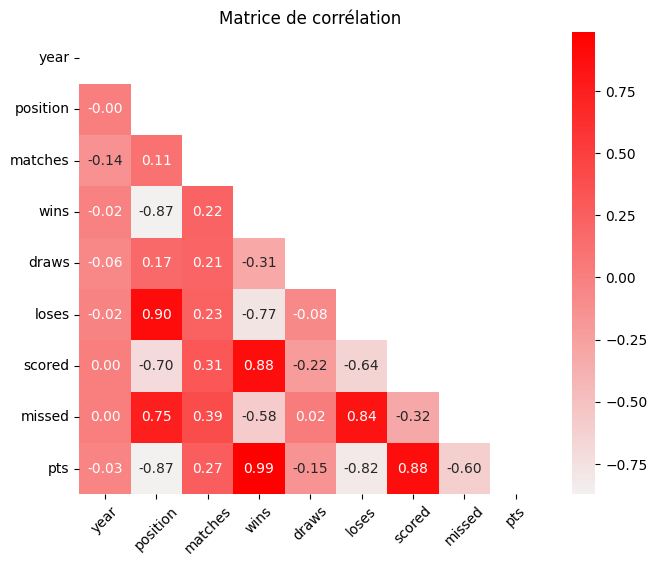

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Initialisation de l'objet PCA
pca = PCA()

# Normalisation des données
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_numeric)

# Ajuster PCA à vos données normalisées
pca.fit(df_normalized)

df_normalized2 = pd.DataFrame(df_normalized, columns=df_numeric.columns)
# Calcul de la matrice de corrélation
correlation_matrix = df_normalized2.corr()

# Définir une palette de couleurs personnalisée sans rouge, allant du vert clair au blanc
cmap_colors = sns.light_palette("red", as_cmap=True)

# Création d'un masque pour la partie supérieure de la matrice
import numpy as np
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


# Affichage de la matrice de corrélation avec un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, mask=mask ,cmap=cmap_colors, fmt=".2f", square=True)
plt.title('Matrice de corrélation')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Obtenir les valeurs propres
eigenvalues= pca.explained_variance_
print("Valeurs propres :")
print(eigenvalues)
print("\n")

# Obtenir les vecteurs propres (composantes principales)
eigenvectors = pca.components_
print("Vecteurs propres :")
print(eigenvectors)
print("\n")

# Vérification de la somme des valeurs propres
sum_of_eigenvalues = np.sum(eigenvalues)
print("Somme des valeurs propres :", sum_of_eigenvalues)
print("\n")

formatted_eigenvalues = ["{:.2f}".format(eig) for eig in eigenvalues]
print("Valeurs propres formatées :")
print(formatted_eigenvalues)


Valeurs propres :
[4.87641892e+00 1.60784726e+00 1.15815992e+00 9.47924647e-01
 2.63393945e-01 1.17676517e-01 4.17559505e-02 2.75291080e-32
 1.47637903e-32]


Vecteurs propres :
[[-2.84295328e-03 -4.29266109e-01  9.79685421e-03  4.34910292e-01
  -8.57926062e-02 -4.12668826e-01  3.78474723e-01 -3.37766918e-01
   4.37600329e-01]
 [ 2.04236947e-01 -1.11651014e-01 -7.48948429e-01 -1.72027807e-01
  -6.04677733e-02 -2.19530109e-01 -3.10942059e-01 -4.13365166e-01
  -1.89468886e-01]
 [-3.92232878e-01 -2.53241367e-02  1.08547814e-01 -1.34387625e-01
   8.31603978e-01 -2.37442223e-01 -1.47118752e-01 -2.14619868e-01
   4.44914530e-03]
 [-8.91725815e-01 -2.36885456e-02 -1.67459248e-01  2.86708437e-02
  -3.98043545e-01  8.45526245e-02 -6.83843360e-02 -5.99716986e-02
  -3.92233934e-02]
 [-9.55017514e-02 -1.10834691e-03 -4.69671273e-01 -1.32153072e-01
   1.79158014e-01 -2.27656382e-01  5.81686900e-01  5.64990567e-01
  -1.06412569e-01]
 [-7.32290149e-03  7.95799278e-01 -4.04643930e-02  2.55644511e-02
 

In [ ]:
# Choix du nombre de composantes principales à conserver, valeur propres > 1
num_components = 3

# Sélection des vecteurs propres correspondant aux composantes principales sélectionnées
selected_eigenvectors = eigenvectors[:, :num_components]
print("Vecteurs propres sélectionnés :")
print(selected_eigenvectors)

Vecteurs propres sélectionnés :
[[-2.84295328e-03 -4.29266109e-01  9.79685421e-03]
 [ 2.04236947e-01 -1.11651014e-01 -7.48948429e-01]
 [-3.92232878e-01 -2.53241367e-02  1.08547814e-01]
 [-8.91725815e-01 -2.36885456e-02 -1.67459248e-01]
 [-9.55017514e-02 -1.10834691e-03 -4.69671273e-01]
 [-7.32290149e-03  7.95799278e-01 -4.04643930e-02]
 [-9.13332541e-03  4.10809544e-01 -1.19160826e-01]
 [-2.32442230e-17 -2.73613856e-16  3.70012114e-01]
 [ 1.66131441e-17  3.69839903e-16 -1.60680757e-01]]


In [ ]:
# Projection des individus sur les composantes principales
projected_data = pca.transform(df_normalized)[:, :3]
print("Projection des individus dans le nouvel espace :")
print(len(projected_data))
print(projected_data)

Projection des individus dans le nouvel espace :
684
[[ 5.93404615 -1.38542811 -0.80418272]
 [ 5.47160211 -2.07023225 -1.79148592]
 [ 3.43294533 -0.70289519  0.90649456]
 ...
 [-1.38625412  2.466211   -1.07232628]
 [-1.38989171  2.29835397 -2.08358969]
 [-2.23831391  2.17138134 -1.57278009]]


In [ ]:
# Calcul de la variance expliquée par chaque composante principale
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante principale :")
for i, explained_variance in enumerate(explained_variance_ratio):
    print("Composante principale {}: {:.2f}%".format(i + 1, explained_variance * 100))

cumulative_variance = np.cumsum(explained_variance_ratio)
print("\nCumulative variance explained by the components:")
for i, cum_variance in enumerate(cumulative_variance):
    print(f"First {i + 1} components: {cum_variance * 100:.2f}%")

Variance expliquée par chaque composante principale :
Composante principale 1: 54.10%
Composante principale 2: 17.84%
Composante principale 3: 12.85%
Composante principale 4: 10.52%
Composante principale 5: 2.92%
Composante principale 6: 1.31%
Composante principale 7: 0.46%
Composante principale 8: 0.00%
Composante principale 9: 0.00%

Cumulative variance explained by the components:
First 1 components: 54.10%
First 2 components: 71.94%
First 3 components: 84.79%
First 4 components: 95.31%
First 5 components: 98.23%
First 6 components: 99.54%
First 7 components: 100.00%
First 8 components: 100.00%
First 9 components: 100.00%


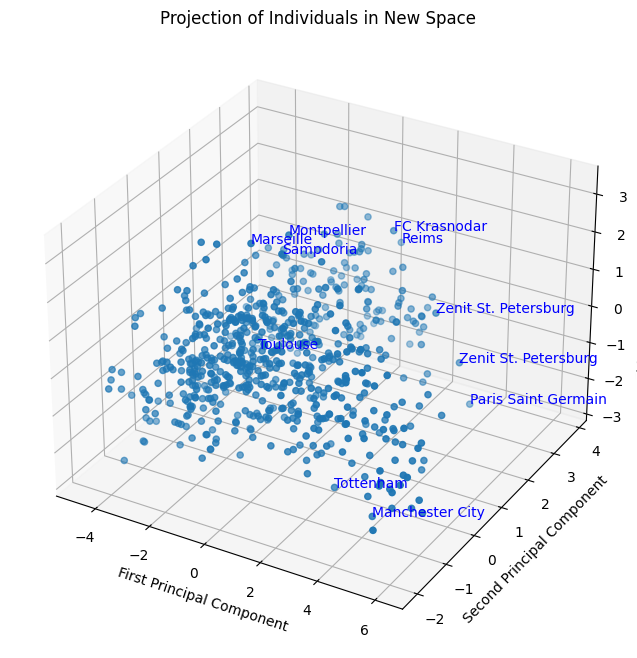

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Assuming projected_data already has the PCA results with at least three components
plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
ax.scatter(projected_data[:, 0], projected_data[:, 1], projected_data[:, 2])

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.set_title('Projection of Individuals in New Space')
ax.grid(True)

# Calculate mean distance to determine crowdedness in 3D space
mean_distance = np.mean(np.linalg.norm(projected_data[1:] - projected_data[:-1], axis=1))

for i, (x, y, z) in enumerate(projected_data):
    crowded = False
    for j, (x2, y2, z2) in enumerate(projected_data):
        if i != j and np.linalg.norm([x - x2, y - y2, z - z2]) < mean_distance / 2:
            crowded = True
            break
    if not crowded:
        ax.text(x, y, z, df['team'].iloc[i], color='blue')

plt.show()

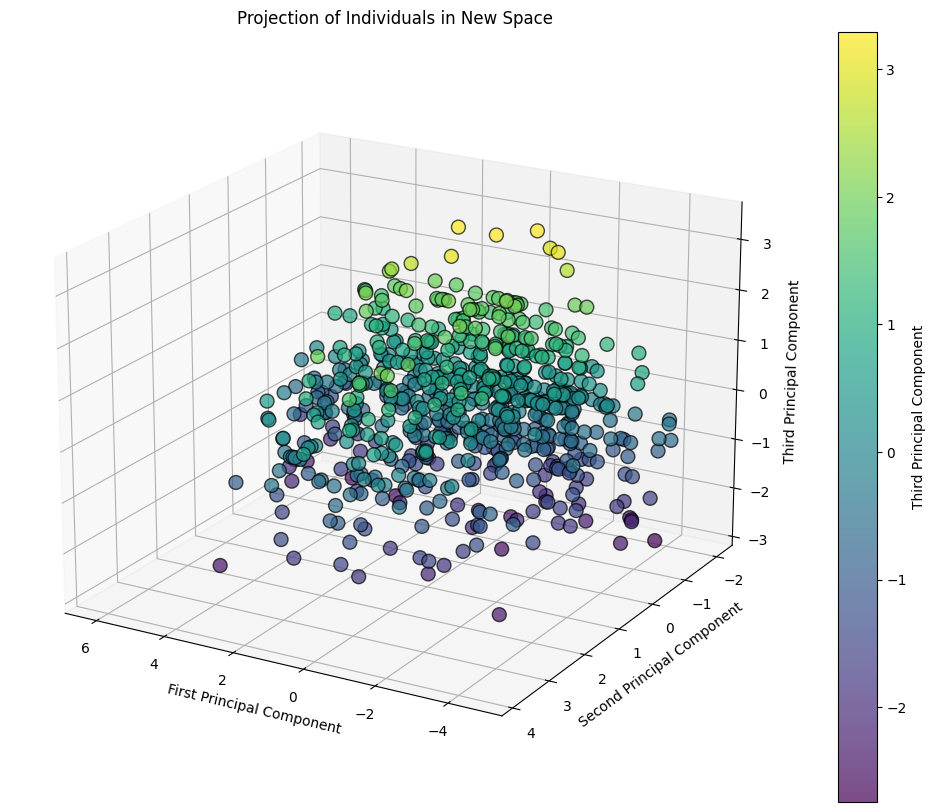

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')

# Scatter plot with larger point size and color mapped by the third principal component
scatter = ax.scatter(projected_data[:, 0], projected_data[:, 1], projected_data[:, 2],
                     c=projected_data[:, 2], cmap='viridis', s=100, edgecolor='k', alpha=0.7)

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.set_title('Projection of Individuals in New Space')
plt.colorbar(scatter, label='Third Principal Component')
ax.grid(True)

# Improve visibility by setting a good initial viewing angle
ax.view_init(elev=20, azim=120)

plt.show()

In [ ]:
import plotly.graph_objects as go

# Create a Plotly figure
fig = go.Figure(data=[go.Scatter3d(
    x=projected_data[:, 0],
    y=projected_data[:, 1],
    z=projected_data[:, 2],
    text=df['team'],  # Assuming 'Club' contains the labels
    mode='markers',
    marker=dict(
        size=5,
        color=projected_data[:, 2],  # Color points by the third principal component
        colorscale='Viridis',
        opacity=0.8
    )
)])

# Update plot layout for a clearer view
fig.update_layout(
    title='Projection of Individuals in New Space',
    scene=dict(
        xaxis_title='First Principal Component',
        yaxis_title='Second Principal Component',
        zaxis_title='Third Principal Component'
    ),
    margin=dict(l=0, r=0, b=0, t=0)  # Reduce default margins
)

fig.show()

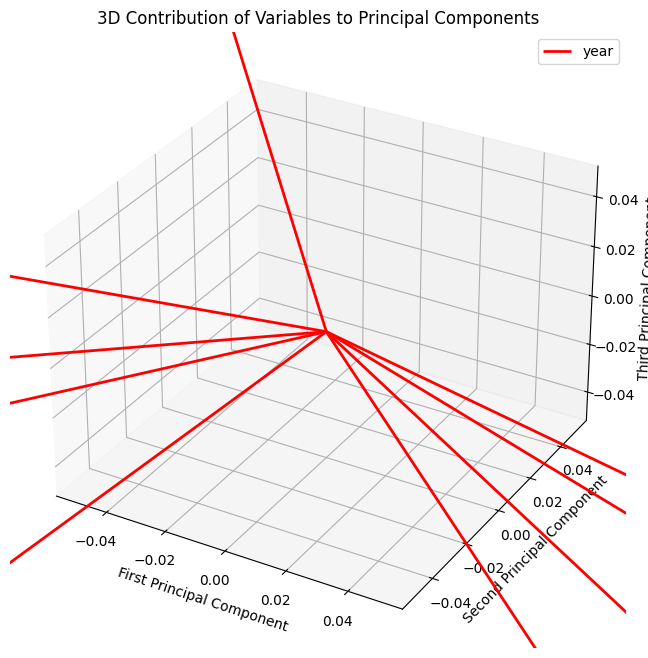

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'eigenvectors' and 'eigenvalues' are defined as from your PCA
n = df_normalized.shape[0]  # Number of observations
p = df_normalized.shape[1]  # Number of variables

sqrt_eigval = np.sqrt(eigenvalues)  # Square root of eigenvalues

# Calculate the coordinates of the variables on the principal axes
corvar = np.zeros((p, p))
for j in range(p):
    corvar[:, j] = eigenvectors[j, :] * sqrt_eigval[j]

# Create DataFrame for the coordinates
coordvar = pd.DataFrame({
    'id': ['year',	'position',	'matches',	'wins',	'draws',	'loses',	'scored',	'missed',	'pts'],
    'COR_1': corvar[:, 0],
    'COR_2': corvar[:, 1],
    'COR_3': corvar[:, 2]
})

# Plotting the 3D space of variable contributions
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Add vectors for each variable
for i in range(p):
    ax.quiver(0, 0, 0, coordvar['COR_1'][i], coordvar['COR_2'][i], coordvar['COR_3'][i], color='r', arrow_length_ratio=0.1, linewidth=2, label=coordvar['id'][i] if i == 0 else "")

# Setting labels
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.set_title('3D Contribution of Variables to Principal Components')

# Adding a legend to identify variables
ax.legend()

plt.show()

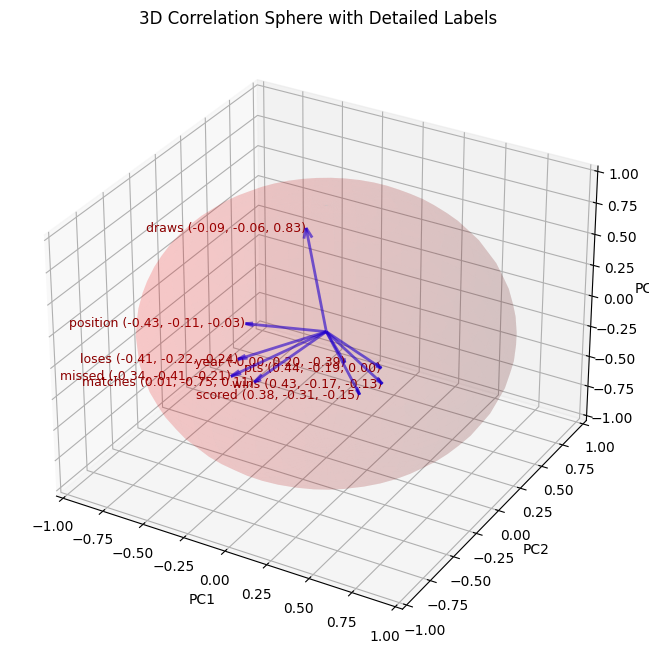

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming pca and df_numeric are previously defined and pca is fitted
loadings = pca.components_.T
variable_names = df_numeric.columns  # Ensure this matches the original variable names used in PCA

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
fig.patch.set_facecolor('white')  # Setting the background color to white for better readability

# Plot each loading vector with detailed annotations
for i, (loading, name) in enumerate(zip(loadings, variable_names)):
    # Drawing the vector
    ax.quiver(0, 0, 0, loading[0], loading[1], loading[2], color='blue', alpha=0.6, lw=2, arrow_length_ratio=0.1)
    # Adding text annotation with vector values
    label = f"{name} ({loading[0]:.2f}, {loading[1]:.2f}, {loading[2]:.2f})"
    ax.text(loading[0], loading[1], loading[2], label, color='darkred', ha='right', va='center', fontsize=9)

# Customize the limits and labels
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Correlation Sphere with Detailed Labels')

# Draw a semi-transparent sphere for reference
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_surface(x, y, z, color='r', alpha=0.1, edgecolor='none')

plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import make_scorer

X_data=projected_data

def score_inertia (estimator,X):
  return estimator.fit(X).inertia_

param_grid = {
    'n_clusters': [2, 3, 4],
    'init': ['k-means++', 'random'],
    'n_init': [5, 10, 15],
    'max_iter': [100, 200],
    'tol': [1e-4, 1e-3]
}
grid=GridSearchCV(estimator=KMeans(), param_grid=param_grid,scoring=make_scorer(score_inertia))

grid.fit(X_data)

grid.best_params_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'


/usr/local/lib/python3.10/dist-packages/sklearn/model_se

{'init': 'k-means++',
 'max_iter': 100,
 'n_clusters': 2,
 'n_init': 5,
 'tol': 0.0001}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

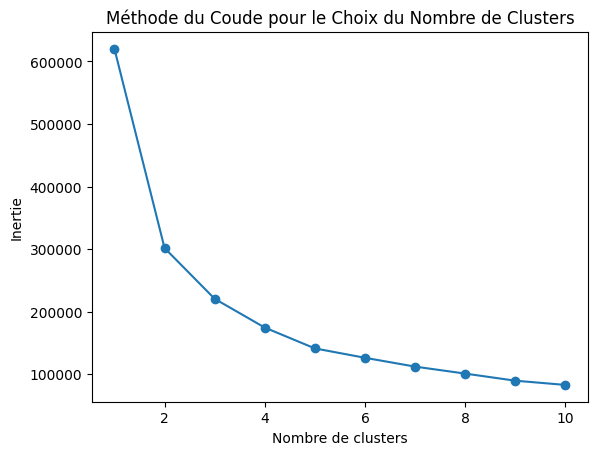

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calcul de l'inertie pour différents nombres de clusters
inertias = []
for i in range(1, 11):  # Tester pour un nombre de clusters de 1 à 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_numeric.values)
    inertias.append(kmeans.inertia_)

# Tracé de la courbe du coude
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel("Inertie")
plt.title('Méthode du Coude pour le Choix du Nombre de Clusters')
plt.show()

In [ ]:
#k-means
from sklearn import cluster
import numpy as np

kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(df_normalized)

#index triés des groupes
idk = np.argsort(kmeans.labels_)
#affichage des observations et leurs groupes
Cldf=pd.DataFrame(df_numeric.index[idk],kmeans.labels_[idk])
print(Cldf)
#distances aux centres de classes des observations
A=kmeans.transform(df_numeric)
print(A)
print(pd.DataFrame({'Classe':kmeans.labels_+1,'ID':df_numeric.index,'DistG1':A[:,0],'DistG2':A[:,1],'DistG3':A[:,2]}))
#print(pandas.DataFrame({'Classe':kmeans.labels_+1,'ID':X.index,'Fonction':Tab.Fonction}))

#print(Tab.Fonction[idk])

      0
0   341
0   325
0   324
0   323
0   322
..  ...
2   333
2   332
2   331
2   320
2     0

[684 rows x 1 columns]
[[2019.97984298 2019.82220714 2019.76921801]
 [2020.58462665 2020.44188833 2020.38344645]
 [2017.42498012 2017.2681694  2017.27807393]
 ...
 [2020.30148299 2020.14608489 2020.25997319]
 [2020.40985884 2020.25669755 2020.36690877]
 [2020.458109   2020.3122254  2020.43641085]]
     Classe   ID       DistG1       DistG2       DistG3
0         3    0  2019.979843  2019.822207  2019.769218
1         3    1  2020.584627  2020.441888  2020.383446
2         3    2  2017.424980  2017.268169  2017.278074
3         3    3  2017.530370  2017.376649  2017.385532
4         3    4  2017.775562  2017.632627  2017.641392
..      ...  ...          ...          ...          ...
679       2  679  2020.424522  2020.268239  2020.372134
680       2  680  2020.325753  2020.172892  2020.292061
681       2  681  2020.301483  2020.146085  2020.259973
682       2  682  2020.409859  2020.256698  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KMeans was fitted without feature names



In [ ]:
# Application de l'algorithme K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_normalized)

# Ajout des informations de clusters aux données
df_numeric['cluster'] = clusters

# Calcul des moyennes des caractéristiques de chaque cluster
cluster_means = df_numeric.groupby('cluster').mean()
print("Moyennes des caractéristiques de chaque cluster :")
print(cluster_means)

# Calcul des différences significatives entre les clusters
cluster_diff = cluster_means.diff().iloc[1:]  # Différences par rapport au premier cluster
print("\nDifférences significatives entre les clusters :")
print(cluster_diff)

# Caractéristiques les plus discriminantes pour chaque cluster
print("\nCaractéristiques les plus discriminantes pour chaque cluster :")
for i, row in cluster_diff.iterrows():
    print(f"Cluster {i}:")
    max_diff_feature = row.idxmax()
    max_diff_value = row.max()
    print(f"Caractéristique la plus discriminante: {max_diff_feature}, Différence: {max_diff_value}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Moyennes des caractéristiques de chaque cluster :
                year   position    matches       wins     draws      loses  \
cluster                                                                      
0        2016.402235  13.860335  37.368715  10.399441  9.737430  17.231844   
1        2016.469072   3.716495  37.015464  20.943299  8.273196   7.798969   
2        2016.810606   9.083333  30.462121  10.628788  8.416667  11.416667   

            scored     missed        pts  
cluster                                   
0        41.600559  57.614525  40.935754  
1        69.149485  38.319588  71.103093  
2        35.257576  37.136364  40.303030  

Différences significatives entre les clusters :
             year   position   matches       wins     draws     loses  \
cluster                                                                 
1        0.066838 -10.143840 -0.353251  10.543858 -1.464234 -9.432875   
2        0.341534   5.366838 -6.553343 -10.314511  0.143471  3.617698   

  

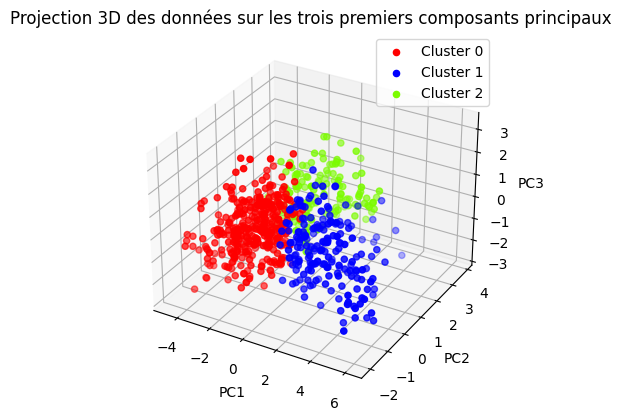

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import nécessaire pour la projection 3D

# Calculer les trois premiers composants principaux
acp = PCA(n_components=3).fit_transform(df_normalized)

# Créer un graphique en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Couleurs pour les différents clusters
colors = ['red', 'blue', 'lawngreen']

# Projeter dans l'espace des trois premiers composants principaux
# avec un code couleur différent selon le groupe
for color, k in zip(colors, [0, 1, 2]):
    # Sélectionner seulement les points appartenant au cluster k
    points = acp[kmeans.labels_ == k]
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=color, label=f'Cluster {k}')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Projection 3D des données sur les trois premiers composants principaux')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



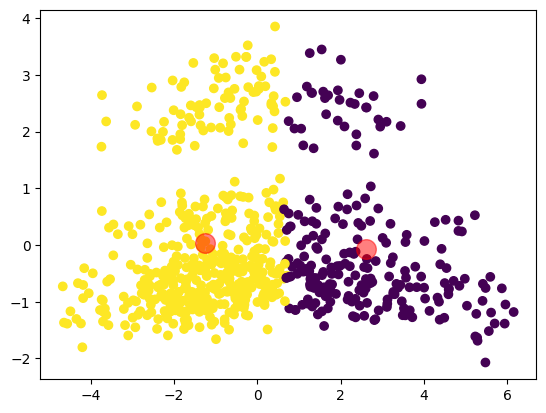

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_data)
y_kmeans = kmeans.predict(X_data)

# Dessiner le graphique de dispersion avec les clusters colorés
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_unsupervised.py", line 117, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_unsupervised.py", line 212, in silhouette_samples
    X, labels = check_X_y(X, labels, accept_sparse=["csc", "csr"])
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 894, in check_array
   

Meilleurs paramètres: {'eps': 0.1, 'min_samples': 2}
Score de silhouette: nan


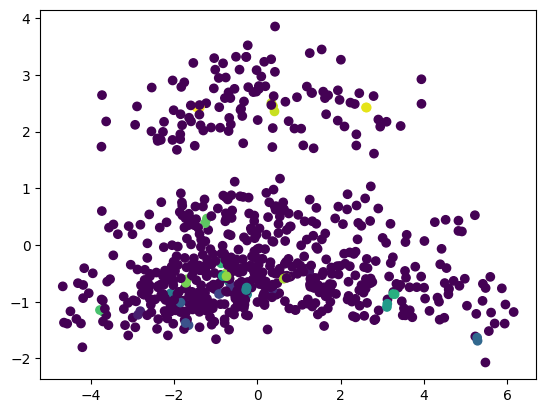

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
param_grid = {
    'eps': np.linspace(0.1, 1.0, 10),
    'min_samples': [2, 3, 4, 5]
}

dbscan = DBSCAN()

grid_search = GridSearchCV(estimator=dbscan, param_grid=param_grid, scoring=silhouette_score, cv=5)
grid_search.fit(X_data)

print("Meilleurs paramètres:", grid_search.best_params_)


print("Score de silhouette:", grid_search.best_score_)

best_dbscan = grid_search.best_estimator_
y_dbscan = best_dbscan.fit_predict(X_data)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_dbscan, cmap='viridis')
plt.show()

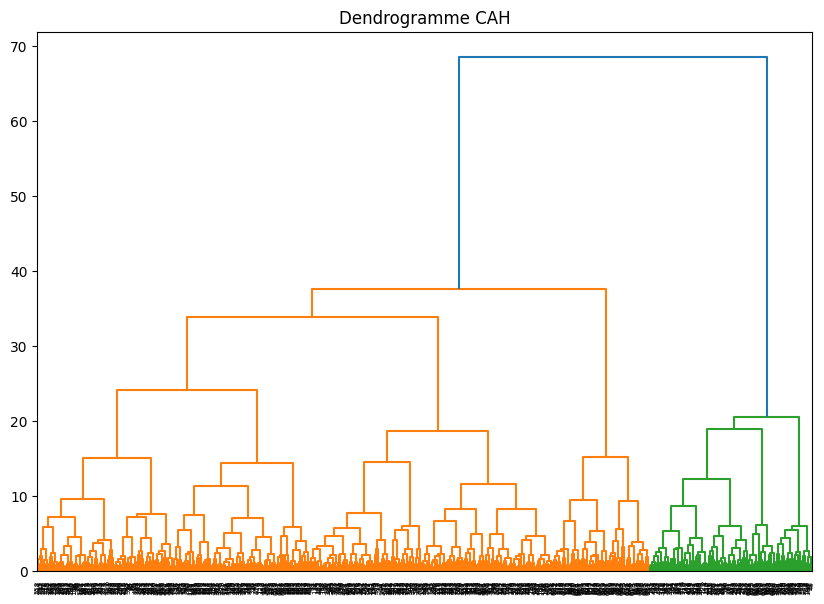

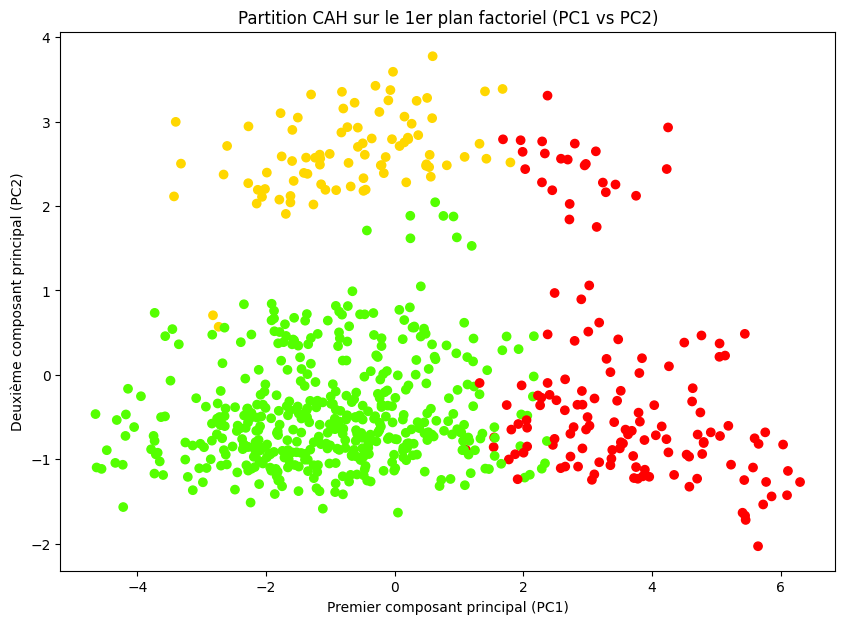

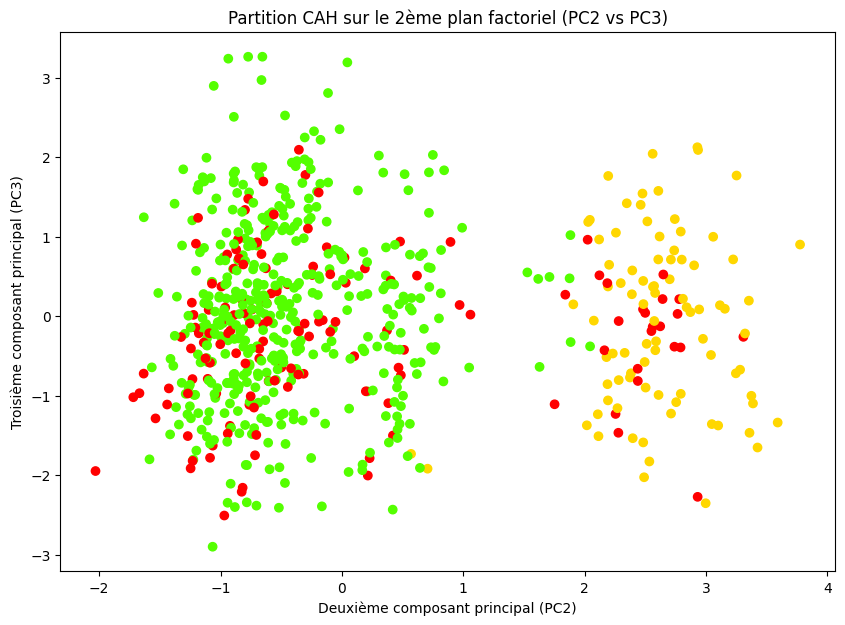

                year   position    matches       wins     draws      loses  \
Cluster                                                                      
1        2016.187500   2.777778  36.159722  22.159722  7.576389   6.423611   
2        2017.081395  11.186047  29.662791   8.616279  8.290698  12.755814   
3        2016.488987  12.158590  37.052863  11.579295  9.687225  15.786344   

            scored     missed        pts  
Cluster                                   
1        71.402778  33.923611  74.055556  
2        29.465116  37.930233  34.139535  
3        44.374449  54.658590  44.425110  


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Je suppose que df_normalized2 est déjà défini et contient les données normalisées

# Utilisation de la méthode 'ward' pour la CAH
linked = linkage(df_normalized2, method='ward')

# Affichage du dendrogramme pour décider du nombre de clusters à retenir
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogramme CAH')
plt.show()

# Formation des clusters en se basant sur le dendrogramme
n_clusters = 3  # Nombre de clusters décidé après observation du dendrogramme
clusters = fcluster(linked, n_clusters, criterion='maxclust')

# Réalisation de l'ACP pour visualiser les clusters sur les plans factoriels
pca = PCA(n_components=3)  # Réduction à trois dimensions pour la visualisation
pca_fit = pca.fit_transform(df_normalized2)

# Visualisation des clusters obtenus sur le premier plan factoriel (PC1 vs PC2)
plt.figure(figsize=(10, 7))
plt.scatter(pca_fit[:, 0], pca_fit[:, 1], c=clusters, cmap='prism')
plt.title('Partition CAH sur le 1er plan factoriel (PC1 vs PC2)')
plt.xlabel('Premier composant principal (PC1)')
plt.ylabel('Deuxième composant principal (PC2)')
plt.show()

# Visualisation des clusters obtenus sur le deuxième plan factoriel (PC2 vs PC3)
plt.figure(figsize=(10, 7))
plt.scatter(pca_fit[:, 1], pca_fit[:, 2], c=clusters, cmap='prism')
plt.title('Partition CAH sur le 2ème plan factoriel (PC2 vs PC3)')
plt.xlabel('Deuxième composant principal (PC2)')
plt.ylabel('Troisième composant principal (PC3)')
plt.show()

# Caractérisation des clusters en affichant la moyenne des variables pour chaque cluster
df_numeric['Cluster'] = clusters  # Ajout de la colonne 'Cluster' à votre DataFrame
print(df_numeric.groupby('Cluster').mean())